In [25]:
setwd("D:/social nerwork/1Replicator dynamics for involution in an infinite well-mixed population (2)")
library(tidyverse)
library(data.table)
library(EvolutionaryGames)
library(ggthemes)
library(latex2exp)
library(ggtext)

In [36]:
duplicate_dynamic<-function(y,M,beta,d,N,c){
  
  #-----参数解释说明------#
  # #N个个体
  # N<-4
  # #M资源 c(5,15,25)
  # M<-5
  # #less effort的成本
  # c<-1
  # #投入效用
  # beta<-1
  # #more effort的成本
  # d<-4
  #-----------------------#
    
  #这里决定用N-1
  #需要取整
  Nd<-floor(y*(N-1))  # 这里有点没懂 换成N就不行了  # floor 返回小于输入值的最大整数值 Nd最大为98，Nc最大为99
  Nc<-N-1-Nd
  
  #策略c（cooperate, less effort）和策略d(defect，more effort)的收益
  #（1）个体选择策略c的期望收益
  pai_c<-(c*M)/((Nc+1)*c+Nd*beta*d)-c
  #（2）个体选择策略d的期望收益
  pai_d<-(beta*d*M)/(Nc*c+(Nd+1)*beta*d)-d
  
  #群体体选择策略c或d的收益  = 概率*pai
  # 此处没有累加
  #等价Pc<(choose(N-1, Nc)*((1-y)^Nc)*(y^Nd))*pai_c
  Pc<-(choose(N-1, Nd)*(y^Nd)*((1-y)^Nc))*pai_c
  Pd<-(choose(N-1, Nd)*(y^Nd)*((1-y)^Nc))*pai_d #choose计算组合数
  
  #（3）群体选择策略d的平均收益
  R_<-y*Pd+(1-y)*Pc
  
  #(4)复制动态方程
  #y.<-y(Pd-R_) = y(Pd-y*Pd-(1-y)*Pc) = y(1-y)(Pd-Pc)
  y.<-y*(1-y)*(Pd-Pc)
}

In [37]:
#----------------------------------------------------------------------#
#------------------------------图3-------------------------------------#
#----------------------------------------------------------------------#

ystar_collect<-function(M,beta,d){
  
  y.<-c()
  
    
  for(y in seq(0, 1, 0.01)){
    temp<-duplicate_dynamic(y,M,beta,d,N=100,c=1)
    
    # N: 个体数
    # M: 资源 c(5,15,25)
    # c: less effort的成本
    # beta: 投入效用
    # d: more effort的成本
    
    y.<-c(y.,temp)
  }
  
  df <- data.frame(x = seq(0,1,0.01), y = y.) %>% 
    mutate(y1=c(y.[-1],1)) %>% 
    mutate(y0=y*y1)
  
  #ystar<-ifelse(sum(df$x[df$y0<0])==0,0,df$x[df$y0<0]+0.005)
  if(all(df$y<=0)){
    ystar<-0 
  }else if(all(df$y>=0)){
    ystar<-1
  }else{
    ystar<-df$x[df$y0<0]+0.005
  }
  
  return(ystar)
}

In [38]:
y.<-c()
  
  for(y in seq(0, 1, 0.01)){
    temp<-duplicate_dynamic(y,M,beta,d,N=100,c=1)
    
    # N: 个体数
    # M: 资源 c(5,15,25)
    # c: less effort的成本
    # beta: 投入效用
    # d: more effort的成本
    
    y.<-c(y.,temp)
  }
  
  df <- data.frame(x = seq(0,1,0.01), y = y.) %>% 
    mutate(y1=c(y.[-1],1)) %>% 
    mutate(y0=y*y1)
df

x,y,y1,y0
<dbl>,<dbl>,<dbl>,<dbl>
0.00,0.000000000,0.107934728,0.000000e+00
0.01,0.107934728,0.135434898,1.461813e-02
0.02,0.135434898,0.143885461,1.948711e-02
0.03,0.143885461,0.143387612,2.063139e-02
0.04,0.143387612,0.137975983,1.978405e-02
0.05,0.137975983,0.129691259,1.789428e-02
0.06,0.129691259,0.119691508,1.552294e-02
0.07,0.119691508,0.108680106,1.300809e-02
0.08,0.108680106,0.097103515,1.055322e-02


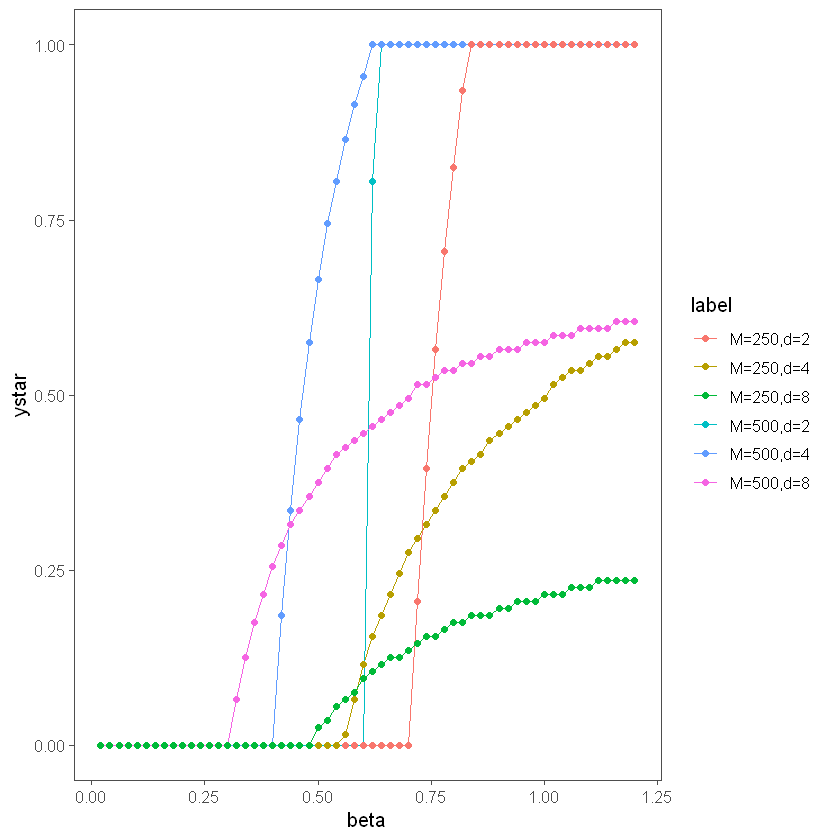

In [28]:
#均衡ystar值收集
parameters<-data.frame(M=c(500,500,500,250,250,250),d=c(2,4,8,2,4,8))
result<-data.frame()

for(i in 1:6){
  M<-parameters$M[i]
  d<-parameters$d[i]
  
  ystars<-c()
  
  for (beta in seq(0.02,1.2,0.02)){
    temp<-ystar_collect(M,beta,d)
    ystars<-c(ystars,temp)
  }
  
  data<-data.frame(M=rep(M,length(ystars)),d=rep(d,length(ystars)),beta=seq(0.02,1.2,0.02),ystar=ystars)
  
  result<-rbind(result,data)
}

#数据可视化
df<-result %>% 
  mutate(label=paste("M=",M,",","d=",d,sep=""))

ggplot(df,aes(x=beta,y=ystar,color=label))+
  geom_line()+
  geom_point()+
  theme_few()

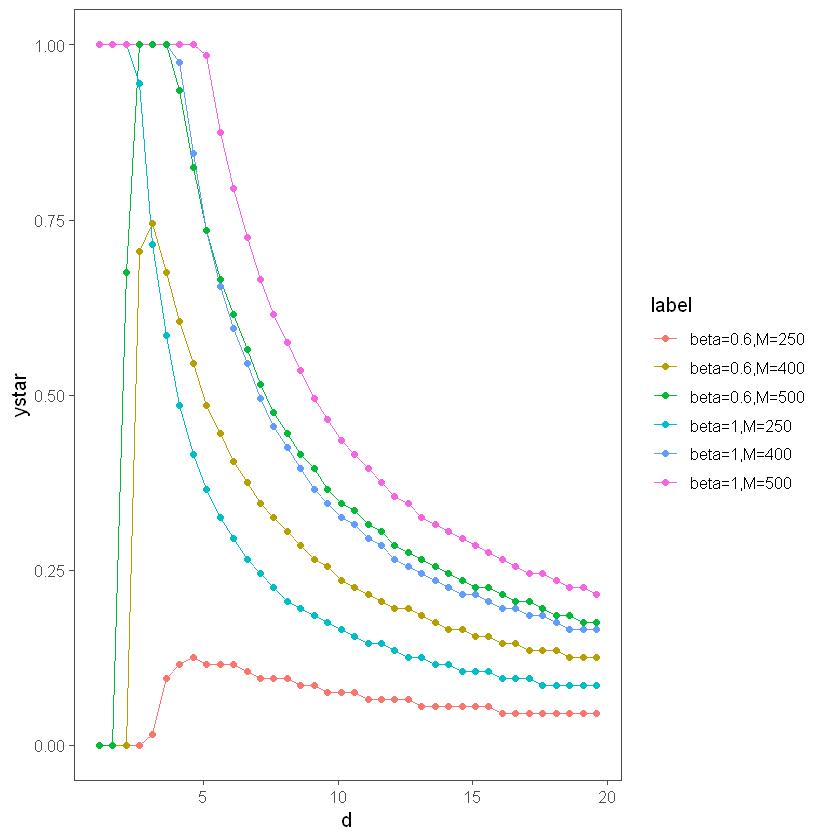

In [33]:
#----------------------------------------------------------------------#
#------------------------------图4-------------------------------------#
#----------------------------------------------------------------------#
#均衡ystar值收集
parameters<-data.frame(beta=c(1,1,1,0.6,0.6,0.6),M=c(250,400,500,250,400,500))
result<-data.frame()

for(i in 1:6){
  beta<-parameters$beta[i]
  M<-parameters$M[i]
  
  ystars<-c()
  
  for (d in seq(1.1,20,0.5)){
    temp<-ystar_collect(M,beta,d)
    ystars<-c(ystars,temp)
  }
  
  data<-data.frame(beta=rep(beta,length(ystars)),M=rep(M,length(ystars)),d=seq(1.1,20,0.5),ystar=ystars)
  
  result<-rbind(result,data)
}

#数据可视化
df<-result %>% 
  mutate(label=paste("beta=",beta,",","M=",M,sep=""))

ggplot(df,aes(x=d,y=ystar,color=label))+
  geom_line()+
  geom_point()+
  theme_few()